In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
#Empty dataframe
data = pd.DataFrame(columns = ['image_path', 'label'])

labels = {
    r"C:\Users\myang\Downloads\Satellite Image data\water": "Water",
    r"C:\Users\myang\Downloads\Satellite Image data\cloudy": "Cloudy",
    r"C:\Users\myang\Downloads\Satellite Image data\green_area": "Green",
    r"C:\Users\myang\Downloads\Satellite Image data\desert": "Desert"
}

In [7]:
#Validate the folder path
for folder in labels:
    if not os.path.exists(folder):
        print(f"Folder does not exist in {folder}")
        continue

    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        if os.path.isfile(image_path):
            label = labels[folder]
            data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index = True)
print(data)

                                             image_path   label
0     C:\Users\myang\Downloads\Satellite Image data\...   Water
1     C:\Users\myang\Downloads\Satellite Image data\...   Water
2     C:\Users\myang\Downloads\Satellite Image data\...   Water
3     C:\Users\myang\Downloads\Satellite Image data\...   Water
4     C:\Users\myang\Downloads\Satellite Image data\...   Water
...                                                 ...     ...
2012  C:\Users\myang\Downloads\Satellite Image data\...  Desert
2013  C:\Users\myang\Downloads\Satellite Image data\...  Desert
2014  C:\Users\myang\Downloads\Satellite Image data\...  Desert
2015  C:\Users\myang\Downloads\Satellite Image data\...  Desert
2016  C:\Users\myang\Downloads\Satellite Image data\...  Desert

[2017 rows x 2 columns]


In [9]:
data.to_csv("image_dataset.csv", index = False)

In [11]:
df = pd.read_csv("image_dataset.csv")
df

,image_path,label
0,C:\Users\myang\Downloads\Satellite Image data\...,Water
1,C:\Users\myang\Downloads\Satellite Image data\...,Water
2,C:\Users\myang\Downloads\Satellite Image data\...,Water
3,C:\Users\myang\Downloads\Satellite Image data\...,Water
4,C:\Users\myang\Downloads\Satellite Image data\...,Water
...,...,...
2012,C:\Users\myang\Downloads\Satellite Image data\...,Desert
2013,C:\Users\myang\Downloads\Satellite Image data\...,Desert
2014,C:\Users\myang\Downloads\Satellite Image data\...,Desert
2015,C:\Users\myang\Downloads\Satellite Image data\...,Desert


In [13]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.3,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 45,
                                   fill_mode = 'nearest')

In [17]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [21]:
train_generator = train_datagen.flow_from_dataframe(dataframe = train_df,
                                                    x_col = 'image_path',
                                                    y_col = 'label',
                                                    target_size = (255, 255),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1613 validated image filenames belonging to 4 classes.


In [25]:
test_generator = train_datagen.flow_from_dataframe(dataframe = test_df,
                                                    x_col = 'image_path',
                                                    y_col = 'label',
                                                    target_size = (255, 255),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 404 validated image filenames belonging to 4 classes.


In [33]:
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32, (3,3), input_shape = (255, 255, 3), activation = 'relu'))
cnnmodel.add(MaxPooling2D(2, 2))
cnnmodel.add(Conv2D(64, (3,3), input_shape = (255, 255, 3), activation = 'relu'))
cnnmodel.add(MaxPooling2D(2, 2))
cnnmodel.add(Conv2D(128, (3,3), input_shape = (255, 255, 3), activation = 'relu'))
cnnmodel.add(MaxPooling2D(2, 2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128, activation = 'relu'))
cnnmodel.add(Dense(4, activation = 'softmax'))

C:\Users\myang\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
cnnmodel.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [77]:
cnnmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = cnnmodel.fit(train_generator, epochs=25, validation_data=test_generator)

C:\Users\myang\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.5436 - loss: 1.7120 - val_accuracy: 0.6238 - val_loss: 0.5697
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.6810 - loss: 0.5545 - val_accuracy: 0.6634 - val_loss: 0.5311
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.7267 - loss: 0.4727 - val_accuracy: 0.8144 - val_loss: 0.4166
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.8210 - loss: 0.4133 - val_accuracy: 0.8069 - val_loss: 0.4344
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 62151s 1243s/step - accuracy: 0.8466 - loss: 0.3836 - val_accuracy: 0.8119 - val_loss: 0.4209
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.8167 - loss: 0.4181 - val_accuracy: 0.8317 - val_loss: 0.3875
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.8370 - loss: 0.4006 - val_accuracy: 0.8366 - val_loss: 0.3554
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.8364 - loss: 0.3629 - val_accuracy: 0.742

In [42]:
cnnmodel.save('SATIMAGE.keras')

In [47]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))

0


In [49]:
tf.debugging.set_log_device_placement(True)

In [51]:
mymodel = load_model('SATIMAGE.keras')

In [55]:
predictions = mymodel.predict(test_generator)
actual_labels = test_generator.classes
predicted_labels = np.argmax(predictions, axis = 1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


<Figure size 1000x600 with 0 Axes>

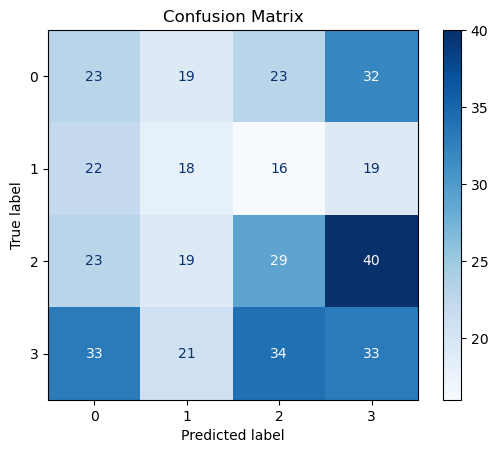

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize = (10,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [83]:
plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], label = ['Training Loss'])
plt.plot(history.history['val_loss'], label = ["Validation Loss"])
plt.title("Training V/s Validation Loss")
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 1000x600 with 0 Axes>